# Separating start and exit data

In [1]:
f=open("logfile.txt","r")
f1=open("start_data.txt","w")
f2=open("exit_data.txt","w")
for line in f:
    if "START" in line:
        f1.write(line)
    else:
        f2.write(line)
    
f.close()
f1.close()
f2.close()
    

# Reading the log files

In [2]:
import pandas as pd
df1=pd.read_csv('start_data.txt', sep='\s+',header=None)
print(df1.head(3))
df2=pd.read_csv('exit_data.txt', sep='\s+',header=None)
print(df2.head(3))
# df3=pd.read_csv('C:\\Users\\TCS\\Downloads\\Shikher\\Shikher\\logfile.txt', sep='\s+',header=None)
# # df3.columns=['Month_start','Date_start','Year_start','Time_start(sec)','Action_start','IP','Month_exit','Date_exit','Year_exit','Time_exit','Action_exit','Duration(sec)','Time_numeric(sec)','Auth_mode','IP_address','public_mode','password_mode','connections','first_start','last_exit']
# df3.to_csv('C:\\Users\\TCS\\Downloads\\Shikher\\Shikher\\logfile.csv', sep='\t', encoding='utf-8')
# print(df3)

   0                  1         2    3    4   5     6         7       8   \
0   0  00000011.005bf888  11235fec  Tue  Jan   2  2018  12:20:25  +05:30   
1   2  00000011.005bf8a5  112360e6  Tue  Jan   2  2018  12:20:50  +05:30   
2   4  00000011.005bf8c2  1123610f  Tue  Jan   2  2018  12:20:55  +05:30   

                          9      10   11         12              13       14  \
0  [daemon_xinetd:info:7828]  START  ssh  pid=60661  157.227.25.219  vsid=-1   
1  [daemon_xinetd:info:7828]  START  ssh  pid=60686  157.227.25.219  vsid=-1   
2  [daemon_xinetd:info:7828]  START  ssh  pid=60711  157.227.25.219  vsid=-1   

          15        16  
0  role=0x10    public  
1  role=0x10  password  
2  role=0x10    public  
   0                  1         2    3    4   5     6         7       8   \
0   1  00000011.005bf8a4  1123600d  Tue  Jan   2  2018  12:20:30  +05:30   
1   3  00000011.005bf8c1  112360e6  Tue  Jan   2  2018  12:20:51  +05:30   
2   5  00000011.005bf8e7  11236128  Tue  Jan  

# Cleaning the log files

In [3]:
# df=df.drop('0,1,2,7,8,10,11,13,14',axis=1,inplace=True)
df1=df1.drop(df1.columns[[0,1,2,3,8,9,11,12,14,15]], axis=1)  
print(df1.head(3))

df2=df2.drop(df2.columns[[0,1,2,3,8,9,11,12,13,15]], axis=1)  
print(df2.head(3))

    4   5     6         7      10              13        16
0  Jan   2  2018  12:20:25  START  157.227.25.219    public
1  Jan   2  2018  12:20:50  START  157.227.25.219  password
2  Jan   2  2018  12:20:55  START  157.227.25.219    public
    4   5     6         7     10  14
0  Jan   2  2018  12:20:30  EXIT   5
1  Jan   2  2018  12:20:51  EXIT   1
2  Jan   2  2018  12:20:58  EXIT   3


# Merging start and exit data

In [4]:
df1.columns = ['start_month', 'start_date','start_year','start_time','action_start','ip','access_mode']
df2.columns = ['exit_month', 'exit_date','exit_year','exit_time','action_exit','duration_in_sec']
print(df1.head(4))
print(df2.head(4))
df=pd.concat([df1,df2],axis=1)
print(df.head(2))
df.to_csv('data.csv', sep='\t', encoding='utf-8')


  start_month  start_date  start_year start_time action_start              ip  \
0         Jan           2        2018   12:20:25        START  157.227.25.219   
1         Jan           2        2018   12:20:50        START  157.227.25.219   
2         Jan           2        2018   12:20:55        START  157.227.25.219   
3         Jan           2        2018   13:13:44        START   157.227.25.54   

  access_mode  
0      public  
1    password  
2      public  
3      public  
  exit_month  exit_date  exit_year exit_time action_exit  duration_in_sec
0        Jan          2       2018  12:20:30        EXIT                5
1        Jan          2       2018  12:20:51        EXIT                1
2        Jan          2       2018  12:20:58        EXIT                3
3        Jan          2       2018  18:42:30        EXIT            19726
  start_month  start_date  start_year start_time action_start              ip  \
0         Jan           2        2018   12:20:25        START  

# Preparing data for the plot

In [5]:
import numpy as np

#UNIQUE IP

total_rows=df['ip'].count()
print("length = ",total_rows)
ip=df.ip.unique()
se = pd.Series(ip)
df4= pd.DataFrame()
df4['ip'] = se.values

#NUMBER OF PUBLIC MODES

public=[]

for i in ip:
    ctr=0
    for y in range (0,total_rows-1):
        if (df.iloc[y]['access_mode']=='public'):
            if(df.iloc[y]['ip']==i):
                ctr=ctr+1
    public.append(ctr)


se = pd.Series(public)
df4['public_mode'] = se.values

#NUMBER OF PASSWORD MODES

password=[]

for i in ip:
    ctr=0
    for y in range (0,total_rows-1):
        if (df.iloc[y]['access_mode']=='password'):
            if(df.iloc[y]['ip']==i):
                ctr=ctr+1
    password.append(ctr)


se = pd.Series(password)
df4['password_mode'] = se.values

#NUMBER OF CONNECTIONS

connection=[]

for i in ip:
    ctr=0
    for y in range (0,total_rows-1):
         if(df.iloc[y]['ip']==i):
            ctr=ctr+1
    connection.append(ctr)


se = pd.Series(connection)
df4['connections'] = se.values

#FIRST_START

start=[]

for i in ip:
    ctr=-1
    for y in range (0,total_rows-1):
        ctr=ctr+1
        if(df.iloc[y]['ip']==i):
            break;
    start.append(ctr)


se = pd.Series(start)
df4['first_start'] = se.values

#LAST_EXIT

last=[]

for i in ip:
    ctr=98
    for y in range (total_rows-1,0,-1):
        ctr=ctr-1
        if(df.iloc[y]['ip']==i):
            break;
    last.append(ctr)

se = pd.Series(last)
df4['last_exit'] = se.values

#DURATION

duration=[]

for i in ip:
    ctr=0
    for y in range (0,total_rows-1):
         if(df.iloc[y]['ip']==i):
            ctr=ctr+(df.iloc[y]['duration_in_sec'])
    duration.append(ctr)


se = pd.Series(duration)
df4['total_duration(sec)'] = se.values


#SAVING GENERATED DATA 
df4.to_csv('data_generated.csv', sep='\t', encoding='utf-8')
print(df4)


length =  98
               ip  public_mode  password_mode  connections  first_start  \
0  157.227.25.219           14              5           19            0   
1   157.227.25.54            9              5           14            3   
2   157.227.25.50            7              5           12            4   
3  157.227.25.150            5             11           16            7   
4   157.227.25.78           17             19           36            8   

   last_exit  total_duration(sec)  
0         85                   13  
1         82                19729  
2         90                21106  
3         89                 1264  
4         97                   16  


# Plotting graph for data

In [6]:
from matplotlib import pyplot as plt
#%matplotlib inline
import seaborn as sns

### BAR GRAPH ( CONNECTIONS VS IP_ADRESS )

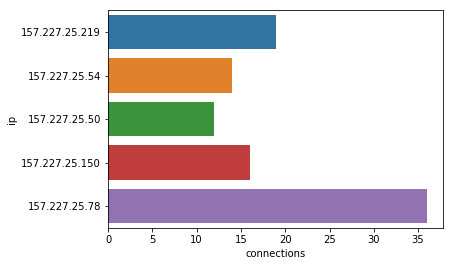

In [7]:
sns.barplot(x='connections',y='ip',data=df4)
plt.show()

### BAR GRAPH ( PUBLIC_CONNECTIONS VS IP_ADRESS )

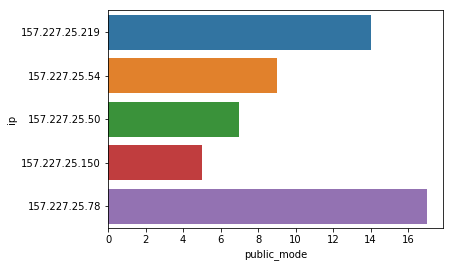

In [8]:
sns.barplot(x='public_mode',y='ip',data=df4)
plt.show()

### BAR GRAPH ( PASSWORD_CONNECTIONS VS IP_ADRESS )

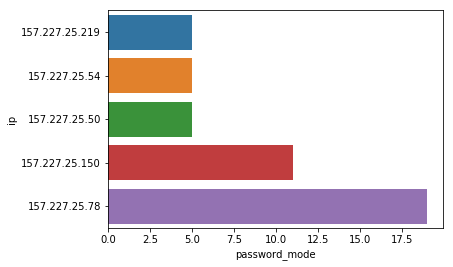

In [9]:
sns.barplot(x='password_mode',y='ip',data=df4)
plt.show()

### BAR GRAPH ( FIRST_START VS IP_ADRESS )

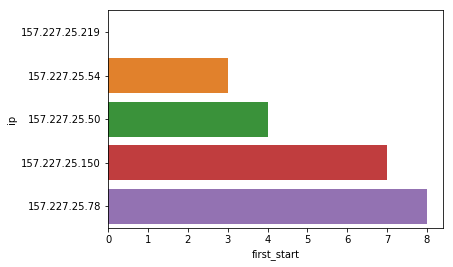

In [10]:
sns.barplot(x='first_start',y='ip',data=df4)
plt.show()

### BAR GRAPH ( LAST_EXIT VS IP_ADRESS )

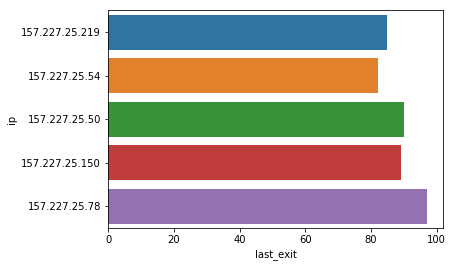

In [11]:
sns.barplot(x='last_exit',y='ip',data=df4)
plt.show()

### BAR GRAPH ( TOTAL_DURATION VS IP_ADRESS )

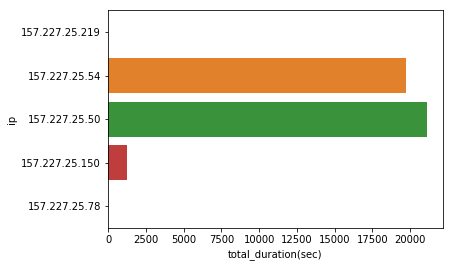

In [12]:
sns.barplot(x='total_duration(sec)',y='ip',data=df4)
plt.show()